# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [3]:
cities

['jamestown',
 'sperkhias',
 'saint-philippe',
 'butaritari',
 'ende',
 'northam',
 'la ronge',
 'ketchikan',
 'ponta do sol',
 'vaini',
 'bengkulu',
 'dingle',
 'souillac',
 'richards bay',
 'auki',
 'kuche',
 'barentsburg',
 'mount gambier',
 'ushuaia',
 'hobart',
 'sitka',
 'esperance',
 'atuona',
 'abu dhabi',
 'avarua',
 'yulara',
 'belushya guba',
 'victoria',
 'jaciara',
 'tilichiki',
 'coquimbo',
 'bluff',
 'hithadhoo',
 'vardo',
 'nikolskoye',
 'sentyabrskiy',
 'strezhevoy',
 'katherine',
 'kaitangata',
 'north vanlaiphai',
 'lebu',
 'barrow',
 'qaanaaq',
 'east london',
 'deputatskiy',
 'busselton',
 'sayaxche',
 'la mana',
 'bathsheba',
 'port lincoln',
 'karratha',
 'owensboro',
 'puerto narino',
 'warqla',
 'gornyak',
 'antofagasta',
 'bemban',
 'ballina',
 'kapaa',
 'mataura',
 'upernavik',
 'khonuu',
 'tsihombe',
 'yellowknife',
 'yarkovo',
 'marigot',
 'taveta',
 'mar del plata',
 'katsuura',
 'ponta delgada',
 'aljezur',
 'punta arenas',
 'quelimane',
 'dikson',
 'mano

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_pd = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp',
              'Wind Speed'])

url = "http://api.openweathermap.org/data/2.5/weather?"


print("Beginning Data Retrieval")
print("-----------------------------")
i = 0

for city in cities:
    
    query_url = url + "appid=" + api_key + "&q=" + city.replace(" ", "+")
    try:
        city_json = requests.get(query_url).json()
        city_json
        cities_pd = cities_pd.append({'City': city_json['name'], 'Cloudiness': city_json['clouds']['all'], 
            'Country': city_json['sys']['country'], 'Date': city_json['dt'], 'Humidity': city_json['main']['humidity'], 
            'Lat': city_json['coord']['lat'], 'Lng': city_json['coord']['lon'], 
            'Max Temp': city_json['main']['temp_max'], 'Wind Speed': city_json['wind']['speed']}, ignore_index=True)
        i += 1
        print(f"Processing Record {i} of Set 1 | {city}")
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
City not found. Skipping...
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | ende
Processing Record 5 of Set 1 | northam
Processing Record 6 of Set 1 | la ronge
Processing Record 7 of Set 1 | ketchikan
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | vaini
City not found. Skipping...
Processing Record 10 of Set 1 | dingle
Processing Record 11 of Set 1 | souillac
Processing Record 12 of Set 1 | richards bay
Processing Record 13 of Set 1 | auki
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | mount gambier
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | abu dhabi
Processing Record 2

Processing Record 181 of Set 1 | santa marta
Processing Record 182 of Set 1 | airai
Processing Record 183 of Set 1 | celestun
City not found. Skipping...
Processing Record 184 of Set 1 | fortuna foothills
Processing Record 185 of Set 1 | toora-khem
Processing Record 186 of Set 1 | mumbwa
Processing Record 187 of Set 1 | severo-kurilsk
Processing Record 188 of Set 1 | kara
Processing Record 189 of Set 1 | hannibal
Processing Record 190 of Set 1 | sorland
Processing Record 191 of Set 1 | isangel
Processing Record 192 of Set 1 | coffs harbour
Processing Record 193 of Set 1 | kiama
Processing Record 194 of Set 1 | arraial do cabo
Processing Record 195 of Set 1 | noumea
Processing Record 196 of Set 1 | nantucket
Processing Record 197 of Set 1 | diamantino
Processing Record 198 of Set 1 | tabory
Processing Record 199 of Set 1 | sao filipe
City not found. Skipping...
Processing Record 200 of Set 1 | alofi
Processing Record 201 of Set 1 | deer lake
Processing Record 202 of Set 1 | fort smith
P

Processing Record 362 of Set 1 | russell
Processing Record 363 of Set 1 | skjervoy
Processing Record 364 of Set 1 | saint anthony
Processing Record 365 of Set 1 | shyroke
Processing Record 366 of Set 1 | tarko-sale
Processing Record 367 of Set 1 | sistranda
Processing Record 368 of Set 1 | kahului
Processing Record 369 of Set 1 | along
Processing Record 370 of Set 1 | martapura
Processing Record 371 of Set 1 | namyslow
Processing Record 372 of Set 1 | bud
Processing Record 373 of Set 1 | aguimes
Processing Record 374 of Set 1 | goderich
Processing Record 375 of Set 1 | rawson
Processing Record 376 of Set 1 | huarmey
Processing Record 377 of Set 1 | palu
Processing Record 378 of Set 1 | porto walter
Processing Record 379 of Set 1 | mizdah
Processing Record 380 of Set 1 | moose factory
Processing Record 381 of Set 1 | karlovac
Processing Record 382 of Set 1 | taoudenni
Processing Record 383 of Set 1 | mega
Processing Record 384 of Set 1 | narsaq
Processing Record 385 of Set 1 | henties b

Processing Record 544 of Set 1 | krasnyy chikoy
Processing Record 545 of Set 1 | virginia beach
Processing Record 546 of Set 1 | trelew
Processing Record 547 of Set 1 | asyut
Processing Record 548 of Set 1 | homer
Processing Record 549 of Set 1 | los llanos de aridane
Processing Record 550 of Set 1 | asmar
Processing Record 551 of Set 1 | bilibino
Processing Record 552 of Set 1 | tumanyan
Processing Record 553 of Set 1 | san benito
Processing Record 554 of Set 1 | grants
Processing Record 555 of Set 1 | kawalu
Processing Record 556 of Set 1 | sari
Processing Record 557 of Set 1 | natal


In [5]:
cities_pd.to_csv("cities_output.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,97,AU,1563938592,78,-33.21,138.60,286.572,3.87
1,Saint-Philippe,75,CA,1563938363,93,45.36,-73.48,294.820,2.83
2,Butaritari,90,KI,1563938592,71,3.07,172.79,302.702,4.79
3,Ende,0,ID,1563938593,76,-8.84,121.65,297.632,2.81
4,Northam,40,AU,1563938593,67,-31.65,116.67,290.150,4.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

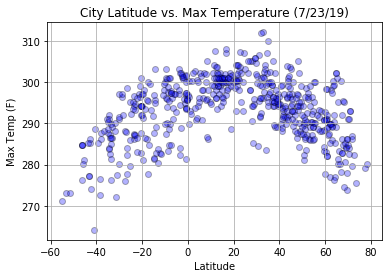

In [7]:
plt.scatter(cities_pd["Lat"], cities_pd["Max Temp"], marker='o', color="blue", 
    alpha=0.3, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (7/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)");
plt.grid()
plt.savefig("max-temp.png")

In [8]:
plt.show()

#### Latitude vs. Humidity Plot

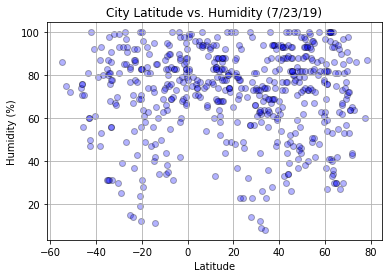

In [9]:
plt.scatter(cities_pd["Lat"], cities_pd["Humidity"], marker='o', color="blue", 
    alpha=0.3, edgecolors="black")
plt.title("City Latitude vs. Humidity (7/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)");
plt.grid()
plt.savefig("humidity.png")


In [10]:
plt.show()

#### Latitude vs. Cloudiness Plot

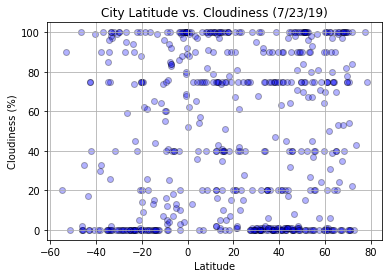

In [11]:
plt.scatter(cities_pd["Lat"], cities_pd["Cloudiness"], marker='o', color="blue", 
    alpha=0.3, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (7/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)");
plt.grid()
plt.savefig("cloudy.png")

In [12]:
plt.show()

#### Latitude vs. Wind Speed Plot

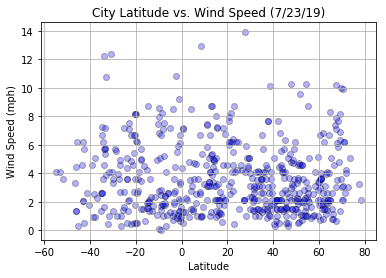

In [13]:
plt.scatter(cities_pd["Lat"], cities_pd["Wind Speed"], marker='o', color="blue", 
    alpha=0.3, edgecolors="black")
plt.title("City Latitude vs. Wind Speed (7/23/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)");
plt.grid()
plt.savefig("wind.png")

In [14]:
plt.show()